In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!ls "/gdrive/My Drive/train001"

imagedata_train001_0_8408.npy
imagedata_train002_0_8394.npy
imagedata_train003_0_8482.npy
imagedata_train004_0_8415.npy
imagedata_train005_0_1427.npy
my_model_train001004002_0_8408_0_8415_0_8394_512.h5
my_model_train001004_0_8394_0_8415_512.h5
my_model_train001005_0_8394_0_1427_512.h5
my_model_train001_0_8408_512.h5
train001.csv
train002.csv
train003.csv
train004.csv
train005.csv


             0  1
0   29127_left  0
1  29127_right  0
2   29132_left  0
3  29132_right  0
4   29135_left  0
(8482,)
0
2019-02-25 13:36:05.243165
Train on 6785 samples, validate on 1697 samples
Epoch 1/10
 - 29s - loss: 4.3433 - acc: 0.7294 - val_loss: 4.0651 - val_acc: 0.7478
Epoch 2/10
 - 29s - loss: 4.3454 - acc: 0.7297 - val_loss: 4.0651 - val_acc: 0.7478
Epoch 3/10
 - 29s - loss: 4.3503 - acc: 0.7294 - val_loss: 4.0651 - val_acc: 0.7478
Epoch 4/10
 - 29s - loss: 4.3487 - acc: 0.7300 - val_loss: 4.0651 - val_acc: 0.7478
Epoch 5/10
 - 29s - loss: 4.3456 - acc: 0.7300 - val_loss: 4.0651 - val_acc: 0.7478
Epoch 6/10
 - 29s - loss: 4.3493 - acc: 0.7300 - val_loss: 4.0651 - val_acc: 0.7478
Epoch 7/10
 - 29s - loss: 4.3449 - acc: 0.7301 - val_loss: 4.0651 - val_acc: 0.7478
Epoch 8/10
 - 29s - loss: 4.3387 - acc: 0.7304 - val_loss: 4.0651 - val_acc: 0.7478
Epoch 9/10
 - 29s - loss: 4.3479 - acc: 0.7298 - val_loss: 4.0651 - val_acc: 0.7478
Epoch 10/10
 - 29s - loss: 4.3474 - acc: 0.7297 - v

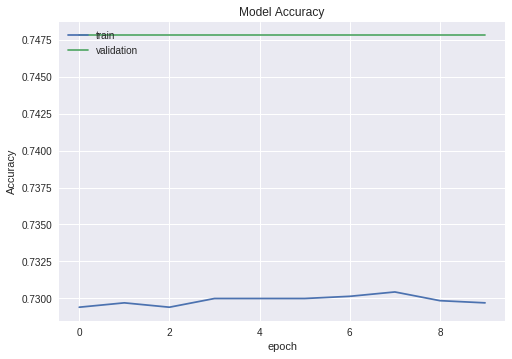

In [7]:
#Training classifier network

#import keras,numpy,os, matplotlib libraries
import datetime as dt
import pandas as pd
import numpy as np
import keras
import os
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16

#reloading CNN outputs compressed image data  from file
features_input = np.load("/gdrive/My Drive/train001/imagedata_train003_0_8482.npy")

#Converting labels to categorial one hot encoding
labels = pd.read_csv("/gdrive/My Drive/train001/train003.csv",header = None)
print(labels.head())
labels = labels.values
labels = labels[0:8482,1]
print(labels.shape)
print(labels[0])
labels = keras.utils.to_categorical(labels, num_classes=5)

#load partially trained model
new_model = load_model('/gdrive/My Drive/train001/my_model_train001004002_0_8408_0_8415_0_8394_512.h5')

#train the model for given number of epochs
training_history = {}
print(dt.datetime.now())
try:
    training_history = new_model.fit(x = features_input, y = labels, batch_size = 32, epochs = 10, verbose = 2, validation_split = 0.2)
except Exception as error:
    print(error)
finally:
    print(training_history.history)  #validation accuracy and loss, training accuracy and loss
    new_model.save('/gdrive/My Drive/train001/my_model_train001004002003_0_8408_0_8415_0_8394_0_8482_512.h5')  # creates a HDF5 file 'my_model.h5'
    #new_model.save_weights('my_model_weigths_train002_0_4000_128.h5') #creates a HDF5 'my_model_weights.h5' weight file
#End of training and va;idation   
print(dt.datetime.now())
#plotting accuracy of training and validation
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()